## Working with Rows and Columns together


#### Reading dataset

We will be using our earlier McKinsey dataset for now

Link:https://drive.google.com/file/d/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_/view?usp=sharing

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_" -O mckinsey.csv

--2023-07-11 01:38:16--  https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_
Resolving drive.google.com (drive.google.com)... 142.250.159.102, 142.250.159.100, 142.250.159.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.159.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/giqtvfdsaf6pada3fd940bggf4baa3rv/1689039450000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=f0dbf8c6-fa0b-4ef1-857c-d7c6470f1377 [following]
--2023-07-11 01:38:16--  https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/giqtvfdsaf6pada3fd940bggf4baa3rv/1689039450000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=f0dbf8c6-fa0b-4ef1-857c-d7c6470f1377
Resolving doc-0s-68-docs.googleusercontent.com (doc-0s-68-docs.googleusercontent.com)... 74.125.70.132, 26

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('mckinsey.csv')

#### How can we slice the dataframe into, say, first 4 rows and first 3 columns?

We can use iloc

In [4]:
df.iloc[1:5, 1:4]

,year,population,continent
1,1957,9240934,Asia
2,1962,10267083,Asia
3,1967,11537966,Asia
4,1972,13079460,Asia


Pass in **2 different ranges for slicing** - **one for row** and **one for column** just like Numpy

Recall,
`iloc` doesn't include the end index while slicing

#### Can we do the same thing with `loc`?

In [5]:
df.loc[1:5, 1:4]

TypeError: ignored

#### Why does slicing using indices doesn't work with `loc`?

Recall, we need to work with explicit labels while using loc

In [6]:
df.loc[1:5, ['country','life_exp']]

,country,life_exp
1,Afghanistan,30.332
2,Afghanistan,31.997
3,Afghanistan,34.020
4,Afghanistan,36.088
5,Afghanistan,38.438


#### We can mention ranges using column labels as well in `loc`

In [7]:
df.loc[1:5, 'year':'population']

,year,population
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460
5,1977,14880372


#### How can we get specific rows and columns?

In [8]:
df.iloc[[0,10,100], [0,2,3]]

,country,population,continent
0,Afghanistan,8425333,Asia
10,Afghanistan,25268405,Asia
100,Bangladesh,70759295,Asia


We pass in those **specific indices packed in `[]`**

#### Can we do step slicing?

**Yes**, just like we did in Numpy

In [9]:
df.iloc[1:10:2]

,country,year,population,continent,life_exp,gdp_cap
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
5,Afghanistan,1977,14880372,Asia,38.438,786.113360
7,Afghanistan,1987,13867957,Asia,40.822,852.395945
9,Afghanistan,1997,22227415,Asia,41.763,635.341351


#### Does step slicing work for loc too?

**YES**

In [10]:
df.loc[1:10:2]

,country,year,population,continent,life_exp,gdp_cap
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
5,Afghanistan,1977,14880372,Asia,38.438,786.113360
7,Afghanistan,1987,13867957,Asia,40.822,852.395945
9,Afghanistan,1997,22227415,Asia,41.763,635.341351


## Pandas built-in operation

Let's select the feature `'life_exp'`



In [11]:
le = df['life_exp']
le

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: life_exp, Length: 1704, dtype: float64

#### How can we find the mean of the col `life_exp`?

In [12]:
le.mean()

59.474439366197174

#### What other operations can we do?

- `sum()`
- `count()`
- `min()`
- `max()`

... and so on

Note:

We can see more methods by pressing "tab" after `le.`


In [13]:
le.sum()

101344.44467999999

In [14]:
le.count()

1704

#### What will happen we get if we divide `sum()` by `count()`?

In [15]:
le.sum() / le.count()

59.474439366197174

It gives the **mean** of life expectancy

## Sorting


If you notice,`life_exp` col is not sorted

#### How can we perform sorting in pandas ?

In [16]:
df.sort_values(['life_exp'])

,country,year,population,continent,life_exp,gdp_cap
1292,Rwanda,1992,7290203,Africa,23.599,737.068595
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
552,Gambia,1952,284320,Africa,30.000,485.230659
36,Angola,1952,4232095,Africa,30.015,3520.610273
1344,Sierra Leone,1952,2143249,Africa,30.331,879.787736
...,...,...,...,...,...,...
1487,Switzerland,2007,7554661,Europe,81.701,37506.419070
695,Iceland,2007,301931,Europe,81.757,36180.789190
802,Japan,2002,127065841,Asia,82.000,28604.591900
671,"Hong Kong, China",2007,6980412,Asia,82.208,39724.978670


Rows get sorted **based on values in `life_exp` column**

By **default**, values are sorted in **ascending order**

#### How can we sort the rows in descending order?

In [17]:
df.sort_values(['life_exp'], ascending=False)

,country,year,population,continent,life_exp,gdp_cap
803,Japan,2007,127467972,Asia,82.603,31656.068060
671,"Hong Kong, China",2007,6980412,Asia,82.208,39724.978670
802,Japan,2002,127065841,Asia,82.000,28604.591900
695,Iceland,2007,301931,Europe,81.757,36180.789190
1487,Switzerland,2007,7554661,Europe,81.701,37506.419070
...,...,...,...,...,...,...
1344,Sierra Leone,1952,2143249,Africa,30.331,879.787736
36,Angola,1952,4232095,Africa,30.015,3520.610273
552,Gambia,1952,284320,Africa,30.000,485.230659
0,Afghanistan,1952,8425333,Asia,28.801,779.445314


Now the rows are sorted in **descending**


#### Can we do sorting on multiple columns?

**YES**

In [18]:
df.sort_values(['year', 'life_exp'])

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
552,Gambia,1952,284320,Africa,30.000,485.230659
36,Angola,1952,4232095,Africa,30.015,3520.610273
1344,Sierra Leone,1952,2143249,Africa,30.331,879.787736
1032,Mozambique,1952,6446316,Africa,31.286,468.526038
...,...,...,...,...,...,...
71,Australia,2007,20434176,Oceania,81.235,34435.367440
1487,Switzerland,2007,7554661,Europe,81.701,37506.419070
695,Iceland,2007,301931,Europe,81.757,36180.789190
671,"Hong Kong, China",2007,6980412,Asia,82.208,39724.978670


#### What exactly happened here?

- Rows were **first sorted** based on **`'year'`**


- Then, **rows with same values of `'year'`** were sorted based on **`'lifeExp'`**


This way, we can do multi-level sorting of our data?

#### How can we have different sorting orders for different columns in multi-level sorting?


In [19]:
df.sort_values(['year', 'life_exp'], ascending=[False, True])

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643
1043,Mozambique,2007,19951656,Africa,42.082,823.685621
1691,Zambia,2007,11746035,Africa,42.384,1271.211593
1355,Sierra Leone,2007,6144562,Africa,42.568,862.540756
887,Lesotho,2007,2012649,Africa,42.592,1569.331442
...,...,...,...,...,...,...
408,Denmark,1952,4334000,Europe,70.780,9692.385245
1464,Sweden,1952,7124673,Europe,71.860,8527.844662
1080,Netherlands,1952,10381988,Europe,72.130,8941.571858
684,Iceland,1952,147962,Europe,72.490,7267.688428


Just **pack `True` and `False` for respective columns in a list `[]`**

In [19]:
# Indices
# Implicit - Internal Indicies 0-(m-1) for rows and 0-(d-1) for columns
          # - Cannot be repeated
# Excplicit - Uses external incidices defined by you
          # - anything immutable - int, float, string, bool
          # - would be same as implcit incides if explicitly not defined
          # - Can be repeated

### Concatenating Dataframes

In [20]:
users = pd.DataFrame({"userid":[1, 2, 3], "name":["sharadh", "shahid", "khusalli"]})
users

,userid,name
0,1,sharadh
1,2,shahid
2,3,khusalli


In [21]:
msgs = pd.DataFrame({"userid":[1, 1, 2, 4], "msg":['hmm', "acha", "theek hai", "nice"]})
msgs

,userid,msg
0,1,hmm
1,1,acha
2,2,theek hai
3,4,nice


In [22]:
# concat is not same as JOIN
# infact concat is just a very DUMB way to just stacking things together
# In JOIN, we use the values from the common column to join the rows
# Note: We are not concatenating the rows here

In [23]:
pd.concat([users, msgs], axis=0) # simple dumb concatination, explicit indexes remain same

,userid,name,msg
0,1,sharadh,NaN
1,2,shahid,NaN
2,3,khusalli,NaN
0,1,NaN,hmm
1,1,NaN,acha
2,2,NaN,theek hai
3,4,NaN,nice


In [24]:
pd.concat([users, msgs], axis=0, ignore_index=True)

,userid,name,msg
0,1,sharadh,NaN
1,2,shahid,NaN
2,3,khusalli,NaN
3,1,NaN,hmm
4,1,NaN,acha
5,2,NaN,theek hai
6,4,NaN,nice


In [25]:
pd.concat([users, msgs], axis=1)

,userid,name,userid,msg
0,1.0,sharadh,1,hmm
1,2.0,shahid,1,acha
2,3.0,khusalli,2,theek hai
3,NaN,NaN,4,nice


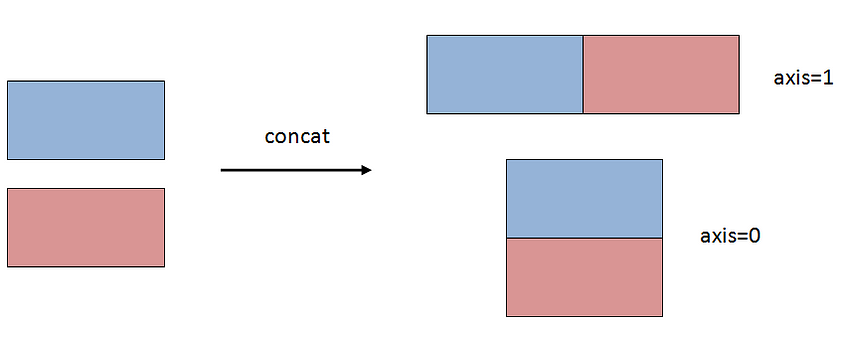

In [26]:
type(np.nan)

float

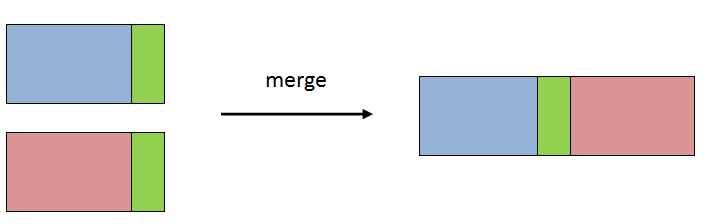

In [27]:
users.merge(msgs, on="userid") # inner

,userid,name,msg
0,1,sharadh,hmm
1,1,sharadh,acha
2,2,shahid,theek hai


In [28]:
users.merge(msgs, on="userid", how="outer")

,userid,name,msg
0,1,sharadh,hmm
1,1,sharadh,acha
2,2,shahid,theek hai
3,3,khusalli,NaN
4,4,NaN,nice


In [29]:
users.merge(msgs, on="userid", how="left")

,userid,name,msg
0,1,sharadh,hmm
1,1,sharadh,acha
2,2,shahid,theek hai
3,3,khusalli,NaN


In [30]:
users.merge(msgs, on="userid", how="inner")

,userid,name,msg
0,1,sharadh,hmm
1,1,sharadh,acha
2,2,shahid,theek hai


In [31]:
users.merge(msgs, on="userid", how="right")

,userid,name,msg
0,1,sharadh,hmm
1,1,sharadh,acha
2,2,shahid,theek hai
3,4,NaN,nice


In [34]:
# the two common columns between the tables are names with different column names
# users - userid ---> id
# msgs - userid ---> userid
# same columns, but different
users.rename(columns = {"userid": "id"}, inplace = True)
users

,id,name
0,1,sharadh
1,2,shahid
2,3,khusalli


In [35]:
users.merge(msgs, how="inner", left_on="id", right_on="userid")

,id,name,userid,msg
0,1,sharadh,1,hmm
1,1,sharadh,1,acha
2,2,shahid,2,theek hai


In [36]:
# Concat - dumb way to stack two dataframes in horizontal or vertical direction
# Merge - Same as JOIN in SQL, merging the rows based on values in the column column

### IMDB Intro

DS in an Analytics firm - insights related to some directors

In [37]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 108MB/s]


In [38]:
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 76.1MB/s]


In [39]:
movies = pd.read_csv('movies.csv')
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [41]:
movies.drop("Unnamed: 0", axis=1, inplace=True)

In [45]:
directors = pd.read_csv('directors.csv', index_col=0)
directors.head()

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [46]:
movies.shape # subset database of some selected movies

(1465, 11)

In [47]:
directors.shape # bigger database of directors, not necessarily just the directors present in movies df

(2349, 3)

In [48]:
# Would we care about the directors for which movie details is not present?
# Merge Movies (L) Directors (R) --> LEFT
# For all the movies present in movies data, add their directors details

In [50]:
# Check unique number of directors present in the movies dataset
movies["director_id"].nunique() # <1465

199

In [51]:
directors["id"].nunique() # all the rows present in directors table are unique

2349

In [52]:
# Can we assume that all the 199 directors in the movies dataset have their details present in directors (2349)?
check = True
for director_id in movies["director_id"].unique():
  if director_id not in directors["id"].unique():
    check = False
    break
print(check)

True


all the 199 directors have details presrnt in the large database of directors

In [53]:
movies["director_id"].isin(directors["id"])

0       True
1       True
2       True
3       True
4       True
        ... 
1460    True
1461    True
1462    True
1463    True
1464    True
Name: director_id, Length: 1465, dtype: bool

In [54]:
np.all(movies["director_id"].isin(directors["id"]))

True

In [55]:
data = movies.merge(directors, how='left', left_on='director_id',right_on='id')
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,4809,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,5369,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,5148,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,5535,Male


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   director_id    1465 non-null   int64  
 8   year           1465 non-null   int64  
 9   month          1465 non-null   object 
 10  day            1465 non-null   object 
 11  director_name  1465 non-null   object 
 12  id_y           1465 non-null   int64  
 13  gender         1341 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 171.7+ KB


In [57]:
data.drop(['director_id','id_y'],axis=1,inplace=True)
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1341 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 148.8+ KB


gender has missing values, but we wont perform missing value treatment because we do not want to geerate gender based inisghts

In [59]:
data.describe()

,id_x,budget,popularity,revenue,vote_average,vote_count,year
count,1465.000000,1.465000e+03,1465.000000,1.465000e+03,1465.000000,1465.000000,1465.000000
mean,45225.191126,4.802295e+07,30.855973,1.432539e+08,6.368191,1146.396587,2002.615017
std,1189.096396,4.935541e+07,34.845214,2.064918e+08,0.818033,1578.077438,8.680141
min,43597.000000,0.000000e+00,0.000000,0.000000e+00,3.000000,1.000000,1976.000000
25%,44236.000000,1.400000e+07,11.000000,1.738013e+07,5.900000,216.000000,1998.000000
50%,45022.000000,3.300000e+07,23.000000,7.578164e+07,6.400000,571.000000,2004.000000
75%,45990.000000,6.600000e+07,41.000000,1.792469e+08,6.900000,1387.000000,2009.000000
max,48395.000000,3.800000e+08,724.000000,2.787965e+09,8.300000,13752.000000,2016.000000


In [60]:
data.describe(include=object)

,title,month,day,director_name,gender
count,1465,1465,1465,1465,1341
unique,1465,12,7,199,2
top,Avatar,Dec,Friday,Steven Spielberg,Male
freq,1,193,654,26,1309


In [63]:
data["revenue"] = (data["revenue"]/1000000).round(2)

In [64]:
data['budget']=(data['budget']/1000000).round(2)

In [65]:
data.describe()

,id_x,budget,popularity,revenue,vote_average,vote_count,year
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,45225.191126,48.022949,30.855973,143.253952,6.368191,1146.396587,2002.615017
std,1189.096396,49.355405,34.845214,206.491831,0.818033,1578.077438,8.680141
min,43597.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1976.000000
25%,44236.000000,14.000000,11.000000,17.380000,5.900000,216.000000,1998.000000
50%,45022.000000,33.000000,23.000000,75.780000,6.400000,571.000000,2004.000000
75%,45990.000000,66.000000,41.000000,179.250000,6.900000,1387.000000,2009.000000
max,48395.000000,380.000000,724.000000,2787.970000,8.300000,13752.000000,2016.000000


### Querying the dataframe

In [67]:
# How can we get movies with ratings > 7?
# SELECT * FROM movies WHERE vote_average > 7
data["vote_average"] > 7 #mask

0        True
1       False
2       False
3        True
4       False
        ...  
1460     True
1461     True
1462    False
1463    False
1464    False
Name: vote_average, Length: 1465, dtype: bool

In [68]:
data.loc[data['vote_average'] > 7] # data[data['vote_average'] > 7] this also works but dont use it

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
3,43600,250.00,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
14,43616,250.00,120,956.02,The Hobbit: The Battle of the Five Armies,7.1,4760,2014,Dec,Wednesday,Peter Jackson,Male
16,43619,250.00,94,958.40,The Hobbit: The Desolation of Smaug,7.6,4524,2013,Dec,Wednesday,Peter Jackson,Male
19,43622,200.00,100,1845.03,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,48321,0.01,20,7.00,Eraserhead,7.5,485,1977,Mar,Saturday,David Lynch,Male
1457,48323,0.00,5,0.00,The Mighty,7.1,51,1998,Oct,Friday,Peter Chelsom,Male
1458,48335,0.06,27,3.22,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male
1460,48363,0.00,3,0.32,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male


In [69]:
# Provide the data of highly rated movies (>7) but return a subset of columns, say, only title and director_name
# SELECT title, director_name FROM movies WHERE vote_average > 7
data.loc[data['vote_average'] > 7, ["title", "director_name"]]

,title,director_name
0,Avatar,James Cameron
3,The Dark Knight Rises,Christopher Nolan
14,The Hobbit: The Battle of the Five Armies,Peter Jackson
16,The Hobbit: The Desolation of Smaug,Peter Jackson
19,Titanic,James Cameron
...,...,...
1456,Eraserhead,David Lynch
1457,The Mighty,Peter Chelsom
1458,Pi,Darren Aronofsky
1460,The Last Waltz,Martin Scorsese


In [70]:
# We want to filter highly rated movies released after 2014?
data.loc[(data['vote_average'] > 7) & (data["year"] > 2014), ["title", "director_name"]]

,title,director_name
30,Furious 7,James Wan
78,Mad Max: Fury Road,George Miller
106,The Revenant,Alejandro González Iñárritu
162,The Martian,Ridley Scott
312,The Man from U.N.C.L.E.,Guy Ritchie
394,The Hateful Eight,Quentin Tarantino
625,The Intern,Nancy Meyers
635,Bridge of Spies,Steven Spielberg
808,Southpaw,Antoine Fuqua
833,Straight Outta Compton,F. Gary Gray


In [74]:
 #How can we find movies released on the weekend (F, S, S)?
 data.loc[(data['day'] == 'Friday') | (data['day'] == 'Saturday') | (data['day'] == 'Sunday')]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
1,43598,300.00,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
12,43614,380.00,135,1045.71,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,May,Saturday,Rob Marshall,Male
22,43627,200.00,35,783.77,Spider-Man 2,6.7,4321,2004,Jun,Friday,Sam Raimi,Male
25,43632,150.00,21,836.30,Transformers: Revenge of the Fallen,6.0,3138,2009,Jun,Friday,Michael Bay,Male
40,43656,200.00,45,769.65,2012,5.6,4903,2009,Oct,Saturday,Roland Emmerich,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1458,48335,0.06,27,3.22,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male
1459,48359,0.00,2,0.00,George Washington,6.4,36,2000,Oct,Sunday,David Gordon Green,Male
1462,48375,0.00,7,0.00,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male
1463,48376,0.00,3,0.00,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male


In [73]:
data.loc[data["day"].isin(["Friday", "Saturday", "Sunday"])]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
1,43598,300.00,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
12,43614,380.00,135,1045.71,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,May,Saturday,Rob Marshall,Male
22,43627,200.00,35,783.77,Spider-Man 2,6.7,4321,2004,Jun,Friday,Sam Raimi,Male
25,43632,150.00,21,836.30,Transformers: Revenge of the Fallen,6.0,3138,2009,Jun,Friday,Michael Bay,Male
40,43656,200.00,45,769.65,2012,5.6,4903,2009,Oct,Saturday,Roland Emmerich,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1458,48335,0.06,27,3.22,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male
1459,48359,0.00,2,0.00,George Washington,6.4,36,2000,Oct,Sunday,David Gordon Green,Male
1462,48375,0.00,7,0.00,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male
1463,48376,0.00,3,0.00,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male


In [77]:
# How will you find Top 5 most popular movies?
data.sort_values(["popularity"], ascending=False).head(5)

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
58,43692,165.0,724,675.12,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male
78,43724,150.0,434,378.86,Mad Max: Fury Road,7.2,9427,2015,May,Wednesday,George Miller,Male
119,43796,140.0,271,655.01,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,2003,Jul,Wednesday,Gore Verbinski,Male
120,43797,125.0,206,752.10,The Hunger Games: Mockingjay - Part 1,6.6,5584,2014,Nov,Tuesday,Francis Lawrence,Male
45,43662,185.0,187,1004.56,The Dark Knight,8.2,12002,2008,Jul,Wednesday,Christopher Nolan,Male


In [80]:
data.sort_values(["title"], ascending=True).head(50)

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
1042,45804,20.0,15,17.28,12 Rounds,5.7,220,2009,Mar,Thursday,Renny Harlin,Male
1083,45945,18.0,52,35.69,127 Hours,7.0,2606,2010,Nov,Friday,Danny Boyle,Male
798,45175,37.0,41,96.46,13 Going on 30,6.3,1204,2004,Apr,Tuesday,Gary Winick,Male
519,44538,50.0,42,69.41,13 Hours: The Secret Soldiers of Benghazi,7.0,938,2016,Jan,Wednesday,Michael Bay,Male
585,44679,55.0,32,65.66,16 Blocks,6.2,661,2006,Mar,Wednesday,Richard Donner,Male
766,45107,35.0,10,31.76,1941,5.6,143,1979,Dec,Thursday,Steven Spielberg,Male
294,44097,76.0,10,236.35,2 Fast 2 Furious,6.2,2028,2003,Jun,Thursday,John Singleton,Male
40,43656,200.0,45,769.65,2012,5.6,4903,2009,Oct,Saturday,Roland Emmerich,Male
709,44967,35.0,45,69.82,21,6.5,1375,2008,Mar,Thursday,Robert Luketic,Male
1034,45784,20.0,32,60.43,21 Grams,7.2,918,2003,Sep,Saturday,Alejandro González Iñárritu,Male


In [81]:
# how will get list of movies directed by a particular director, say, 'Christopher Nolan'?
# Filtering of rows has to be done based on value Christopher Nolan
# Selection of columns will be basically be title
data.loc[data["director_name"] == "Christopher Nolan", ["title"]]

,title
3,The Dark Knight Rises
45,The Dark Knight
58,Interstellar
59,Inception
74,Batman Begins
565,Insomnia
641,The Prestige
1341,Memento


### Apply

Gender - Male, Female

Male - 1
Female - 0
Missing Values - NaN

In [82]:
# for one value
def encode(gender):
  if gender == "Male":
    return 1
  elif gender == "Female":
    return 0
  else:
    return gender

In [83]:
encoded_gender = []
for gender in data["gender"]:
  encoded_gender.append(encode(gender))

In [84]:
data["gender"].apply(encode)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1460    1.0
1461    1.0
1462    1.0
1463    1.0
1464    NaN
Name: gender, Length: 1465, dtype: float64

In [88]:
 # How to find sum of revenue and budget per movie?
 data[["revenue", "budget"]].apply(np.sum) # axis=0 by default

revenue    209867.04
budget      70353.62
dtype: float64

In [90]:
 # How to find sum of revenue and budget per movie?
data[["revenue", "budget"]].apply(np.sum, axis=1)

0       3024.97
1       1261.00
2       1125.67
3       1334.94
4       1148.87
         ...   
1460       0.32
1461       3.18
1462       0.00
1463       0.00
1464       2.26
Length: 1465, dtype: float64

In [93]:
# Find profit for every movie, Profit = Revenue - Budget

def calc_profit(x):
  # x is actually a row with a budget revenue pair
  print(x, type(x))
  return x["revenue"] - x["budget"]
data[["revenue", "budget"]].apply(calc_profit, axis=1)

revenue    2787.97
budget      237.00
Name: 0, dtype: float64 <class 'pandas.core.series.Series'>
revenue    961.0
budget     300.0
Name: 1, dtype: float64 <class 'pandas.core.series.Series'>
revenue    880.67
budget     245.00
Name: 2, dtype: float64 <class 'pandas.core.series.Series'>
revenue    1084.94
budget      250.00
Name: 3, dtype: float64 <class 'pandas.core.series.Series'>
revenue    890.87
budget     258.00
Name: 4, dtype: float64 <class 'pandas.core.series.Series'>
revenue    873.26
budget     250.00
Name: 5, dtype: float64 <class 'pandas.core.series.Series'>
revenue    391.08
budget     270.00
Name: 6, dtype: float64 <class 'pandas.core.series.Series'>
revenue    586.09
budget     200.00
Name: 7, dtype: float64 <class 'pandas.core.series.Series'>
revenue    1065.66
budget      200.00
Name: 8, dtype: float64 <class 'pandas.core.series.Series'>
revenue     89.29
budget     255.00
Name: 9, dtype: float64 <class 'pandas.core.series.Series'>
revenue    662.85
budget     225.00


0       2550.97
1        661.00
2        635.67
3        834.94
4        632.87
         ...   
1460       0.32
1461       3.12
1462       0.00
1463       0.00
1464       1.82
Length: 1465, dtype: float64